In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
label_map = {
    'aposteriori': 'a-posteriori',
    'apriori': 'a-priori',
    'none': 'none',
    'apriori (unbiased)': 'a-priori',
}

## Theorem 2: Var(DP)-apo-str ~ Var(DP)-apo-uni for large m

In [85]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_stratified.csv'
f2 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_uniform.csv'

g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_stratified.csv'
g2 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_uniform.csv'

h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_stratified.csv'
h2 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_uniform.csv'

In [86]:
df1 = pd.read_csv(f1); df2 = pd.read_csv(f2)
dg1 = pd.read_csv(g1); dg2 = pd.read_csv(g2)
dh1 = pd.read_csv(h1); dh2 = pd.read_csv(h2)

# keep only aposteriori collaboration
df1 = df1[df1['collaboration'] == 'aposteriori']; df2 = df2[df2['collaboration'] == 'aposteriori']
dg1 = dg1[dg1['collaboration'] == 'aposteriori']; dg2 = dg2[dg2['collaboration'] == 'aposteriori']
dh1 = dh1[dh1['collaboration'] == 'aposteriori']; dh2 = dh2[dh2['collaboration'] == 'aposteriori']

# add a column to indicate the sampling strategy
df1['sample'] = 'stratified'; df2['sample'] = 'uniform'
dg1['sample'] = 'stratified'; dg2['sample'] = 'uniform'
dh1['sample'] = 'stratified'; dh2['sample'] = 'uniform'

# concatenate the two dataframes
df = pd.concat([df1, df2])
dg = pd.concat([dg1, dg2])
dh = pd.concat([dh1, dh2])

In [87]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

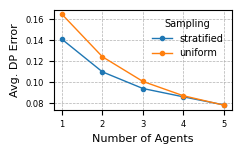

In [88]:
# plot budget vs dp_error for each sampling strategy
fig, ax = plt.subplots()
for sampling_strategy in df['sample'].unique():
    df_temp = df[df['sample'] == sampling_strategy]
    ax.plot(df_temp['n'], df_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sampling')

plot_name = 'ft_multicolab_str_vs_uni.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'ft_multicolab_str_vs_uni.csv'
df.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

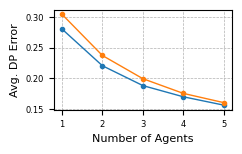

In [89]:
# plot for dg
fig, ax = plt.subplots()
for sampling_strategy in dg['sample'].unique():
    dg_temp = dg[dg['sample'] == sampling_strategy]
    ax.plot(dg_temp['n'], dg_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'gc_multicolab_str_vs_uni.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'gc_multicolab_str_vs_uni.csv'
dg.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

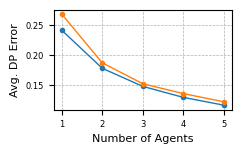

In [90]:
# plot for dh
fig, ax = plt.subplots()
for sampling_strategy in dh['sample'].unique():
    dh_temp = dh[dh['sample'] == sampling_strategy]
    ax.plot(dh_temp['n'], dh_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'pp_multicolab_str_vs_uni.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'pp_multicolab_str_vs_uni.csv'
dh.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

## Theorem 1: Var(DP)-apo-str < Var(DP)-apo-uni

In [103]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_stratified_budget_vs_cum_error.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_stratified_budget_vs_cum_error.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_stratified_budget_vs_cum_error.csv'

In [104]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

# keep only aposteriori and none collaboration
df1 = df1[~(df1['collaboration'] == 'apriori (unbiased)')]
dg1 = dg1[~(dg1['collaboration'] == 'apriori (unbiased)')]
dh1 = dh1[~(dh1['collaboration'] == 'apriori (unbiased)')]

In [105]:
s = 8
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

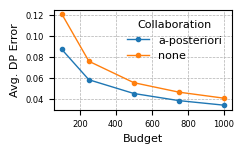

In [106]:
# plot budget vs dp_error for each collaboration
fig, ax = plt.subplots()
for collaboration in df1['collaboration'].unique():
    df_temp = df1[df1['collaboration'] == collaboration]
    ax.plot(df_temp['budget'], df_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')
ax.legend(title='Collaboration')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'ft_budget_vs_error.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'ft_budget_vs_error.csv'
df1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

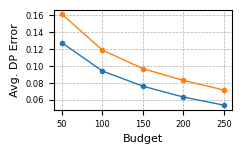

In [107]:
# plot for dg
fig, ax = plt.subplots()
for collaboration in dg1['collaboration'].unique():
    dg_temp = dg1[dg1['collaboration'] == collaboration]
    ax.plot(dg_temp['budget'], dg_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'gc_budget_vs_error.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'gc_budget_vs_error.csv'
dg1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

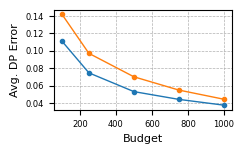

In [108]:
# plot for dh
fig, ax = plt.subplots()
for collaboration in dh1['collaboration'].unique():
    dh_temp = dh1[dh1['collaboration'] == collaboration]
    ax.plot(dh_temp['budget'], dh_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'pp_budget_vs_error.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'pp_budget_vs_error.csv'
dh1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

## Theorem 3: Var(DP)-apr-str can increase for a large m

In [91]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_stratified.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_stratified.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_stratified.csv'

In [92]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

# remove collaboration == none
df1 = df1[~(df1['collaboration'] == 'none')]
dg1 = dg1[~(dg1['collaboration'] == 'none')]
dh1 = dh1[~(dh1['collaboration'] == 'none')]

In [93]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

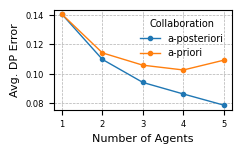

In [94]:
# plot n vs cum_dp_error for each collaboration
fig, ax = plt.subplots()
for collaboration in ['aposteriori', 'apriori']:
    df_temp = df1[df1['collaboration'] == collaboration]
    ax.plot(df_temp['n'], df_temp['cum_dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')
ax.legend(title='Collaboration')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'ft_multicolab_apr_vs_apo.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'ft_multicolab_apr_vs_apo.csv'
df1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

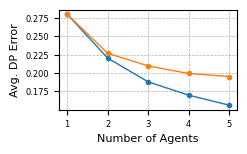

In [95]:
# plot for dg
fig, ax = plt.subplots()
for collaboration in ['aposteriori', 'apriori']:
    dg_temp = dg1[dg1['collaboration'] == collaboration]
    ax.plot(dg_temp['n'], dg_temp['cum_dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'gc_multicolab_apr_vs_apo.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'gc_multicolab_apr_vs_apo.csv'
dg1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

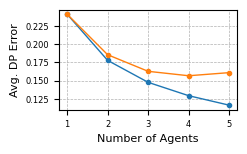

In [96]:
# plot for dh
fig, ax = plt.subplots()
for collaboration in ['aposteriori', 'apriori']:
    dh_temp = dh1[dh1['collaboration'] == collaboration]
    ax.plot(dh_temp['n'], dh_temp['cum_dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'pp_multicolab_apr_vs_apo.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'pp_multicolab_apr_vs_apo.csv'
dh1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

## Theorem 1 with apriori

In [78]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_stratified_budget_vs_cum_error.csv'
g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_stratified_budget_vs_cum_error.csv'
h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_stratified_budget_vs_cum_error.csv'

In [79]:
df1 = pd.read_csv(f1)
dg1 = pd.read_csv(g1)
dh1 = pd.read_csv(h1)

In [80]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s+1,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

In [81]:
collabs = df1['collaboration'].unique()

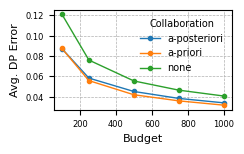

In [82]:
# plot budget vs dp_error for each collaboration
fig, ax = plt.subplots()
for collaboration in collabs:
    df_temp = df1[df1['collaboration'] == collaboration]
    ax.plot(df_temp['budget'], df_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')
ax.legend(title='Collaboration')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'ft_budget_vs_error_all.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'ft_budget_vs_error_all.csv'
df1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

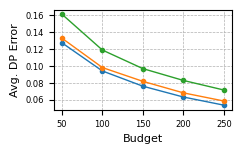

In [83]:
# plot for dg
fig, ax = plt.subplots()
for collaboration in collabs:
    dg_temp = dg1[dg1['collaboration'] == collaboration]
    ax.plot(dg_temp['budget'], dg_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'gc_budget_vs_error_all.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'gc_budget_vs_error_all.csv'
dg1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

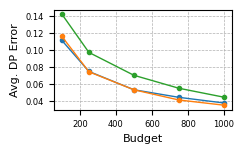

In [84]:
# plot for dh
fig, ax = plt.subplots()
for collaboration in collabs:
    dh_temp = dh1[dh1['collaboration'] == collaboration]
    ax.plot(dh_temp['budget'], dh_temp['dp_error'], label=label_map[collaboration], marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'pp_budget_vs_error_all.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'pp_budget_vs_error_all.csv'
dh1.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

## Theorem 2 with all sampling strategies

In [97]:
f1 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_stratified.csv'
f2 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_uniform.csv'
f3 = '/home/dhasade/audits/ml-audits/results/plots_data/ft_multicolab_neyman.csv'

g1 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_stratified.csv'
g2 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_uniform.csv'
g3 = '/home/dhasade/audits/ml-audits/results/plots_data/gc_multicolab_neyman.csv'

h1 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_stratified.csv'
h2 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_uniform.csv'
h3 = '/home/dhasade/audits/ml-audits/results/plots_data/pp_multicolab_neyman.csv'

In [98]:
df1 = pd.read_csv(f1); df2 = pd.read_csv(f2); df3 = pd.read_csv(f3)
dg1 = pd.read_csv(g1); dg2 = pd.read_csv(g2); dg3 = pd.read_csv(g3)
dh1 = pd.read_csv(h1); dh2 = pd.read_csv(h2); dh3 = pd.read_csv(h3)

# keep only aposteriori collaboration
df1 = df1[df1['collaboration'] == 'aposteriori']; df2 = df2[df2['collaboration'] == 'aposteriori']; df3 = df3[df3['collaboration'] == 'aposteriori']
dg1 = dg1[dg1['collaboration'] == 'aposteriori']; dg2 = dg2[dg2['collaboration'] == 'aposteriori']; dg3 = dg3[dg3['collaboration'] == 'aposteriori']
dh1 = dh1[dh1['collaboration'] == 'aposteriori']; dh2 = dh2[dh2['collaboration'] == 'aposteriori']; dh3 = dh3[dh3['collaboration'] == 'aposteriori']

# add a column to indicate the sampling strategy
df1['sample'] = 'stratified'; df2['sample'] = 'uniform'; df3['sample'] = 'neyman'
dg1['sample'] = 'stratified'; dg2['sample'] = 'uniform'; dg3['sample'] = 'neyman'
dh1['sample'] = 'stratified'; dh2['sample'] = 'uniform'; dh3['sample'] = 'neyman'

# concatenate the two dataframes
df = pd.concat([df2, df3])
dg = pd.concat([dg2, dg3])
dh = pd.concat([dh2, dh3])

In [99]:
s = 7
params = {
   'legend.fontsize': s,
   'legend.title_fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s+1,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

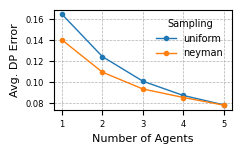

In [100]:
# plot budget vs dp_error for each sampling strategy
fig, ax = plt.subplots()
for sampling_strategy in df['sample'].unique():
    df_temp = df[df['sample'] == sampling_strategy]
    ax.plot(df_temp['n'], df_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sampling')

plot_name = 'ft_multicolab_uni_vs_neyman.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'ft_multicolab_uni_vs_neyman.csv'
df.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

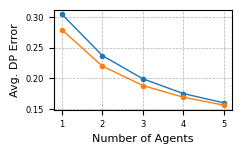

In [101]:
# plot for dg
fig, ax = plt.subplots()
for sampling_strategy in dg['sample'].unique():
    dg_temp = dg[dg['sample'] == sampling_strategy]
    ax.plot(dg_temp['n'], dg_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'gc_multicolab_uni_vs_neyman.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'gc_multicolab_uni_vs_neyman.csv'
dg.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)

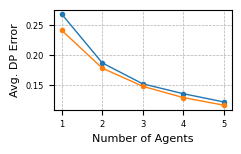

In [102]:
# plot for dh
fig, ax = plt.subplots()
for sampling_strategy in dh['sample'].unique():
    dh_temp = dh[dh['sample'] == sampling_strategy]
    ax.plot(dh_temp['n'], dh_temp['cum_dp_error'], label=sampling_strategy, marker='o')

ax.set_xlabel('Number of Agents')
ax.set_ylabel('Avg. DP Error')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plot_name = 'pp_multicolab_uni_vs_neyman.pdf'
plt.savefig(f'/home/dhasade/audits/ml-audits/results/ECAI/plots/{plot_name}', bbox_inches='tight', dpi=300)

csv_name = 'pp_multicolab_uni_vs_neyman.csv'
dh.to_csv(f'/home/dhasade/audits/ml-audits/results/ECAI/plots_data/{csv_name}', index=False)